# 机器学习纳米学位
## 非监督学习
## 项目 3: 创建用户分类

欢迎来到机器学习工程师纳米学位的第三个项目！在这个notebook文件中，有些模板代码已经提供给你，但你还需要实现更多的功能来完成这个项目。除非有明确要求，你无须修改任何已给出的代码。以**'练习'**开始的标题表示接下来的代码部分中有你必须要实现的功能。每一部分都会有详细的指导，需要实现的部分也会在注释中以**'TODO'**标出。请仔细阅读所有的提示！

除了实现代码外，你还**必须**回答一些与项目和你的实现有关的问题。每一个需要你回答的问题都会以**'问题 X'**为标题。请仔细阅读每个问题，并且在问题后的**'回答'**文字框中写出完整的答案。我们将根据你对问题的回答和撰写代码所实现的功能来对你提交的项目进行评分。

>**提示：**Code 和 Markdown 区域可通过 **Shift + Enter** 快捷键运行。此外，Markdown可以通过双击进入编辑模式。

## 开始

在这个项目中，你将分析一个数据集的内在结构，这个数据集包含很多客户真对不同类型产品的年度采购额（用**金额**表示）。这个项目的任务之一是如何最好地描述一个批发商不同种类顾客之间的差异。这样做将能够使得批发商能够更好的组织他们的物流服务以满足每个客户的需求。

这个项目的数据集能够在[UCI机器学习信息库](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers)中找到.因为这个项目的目的，分析将不会包括'Channel'和'Region'这两个特征——重点集中在6个记录的客户购买的产品类别上。

运行下面的的代码单元以载入整个客户数据集和一些这个项目需要的Python库。如果你的数据集载入成功，你将看到后面输出数据集的大小。

In [1]:
# 引入这个项目需要的库
import numpy as np
import pandas as pd
import visuals as rs
from IPython.display import display # 使得我们可以对DataFrame使用display()函数

# 设置以内联的形式显示matplotlib绘制的图片（在notebook中显示更美观）
%matplotlib inline

# 载入整个客户数据集
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## 分析数据
在这部分，你将开始分析数据，通过可视化和代码来理解每一个特征和其他特征的联系。你会看到关于数据集的统计描述，考虑每一个属性的相关性，然后从数据集中选择若干个样本数据点，你将在整个项目中一直跟踪研究这几个数据点。

运行下面的代码单元给出数据集的一个统计描述。注意这个数据集包含了6个重要的产品类型：**'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**和 **'Delicatessen'**。想一下这里每一个类型代表你会购买什么样的产品。

In [2]:
# 显示数据集的一个描述
display(data.describe())

# lll = []
# for i in range(data.shape[0]):
#     lll.append(sum([ii for ii in data.loc[i]]))

# lll = pd.Series(data=lll)
# lll = lll.to_frame()
# display(lll.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### 练习: 选择样本
为了对客户有一个更好的了解，并且了解代表他们的数据将会在这个分析过程中如何变换。最好是选择几个样本数据点，并且更为详细地分析它们。在下面的代码单元中，选择**三个**索引加入到索引列表`indices`中，这三个索引代表你要追踪的客户。我们建议你不断尝试，直到找到三个明显不同的客户。

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,112151,29627,18148,16745,4948,8550
1,16117,46197,92780,1026,40827,2944
2,36847,43950,20170,36534,239,47943


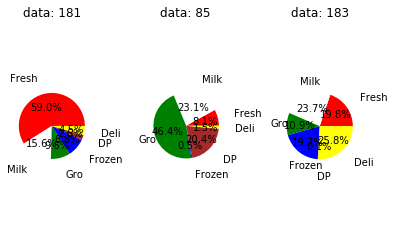

In [3]:
# TODO：从数据集中选择三个你希望抽样的数据点的索引
import matplotlib.pyplot as plt
x0 = data.loc[data['Fresh'].idxmax()]            #maybe restaurant
x1 = data.loc[data['Milk'].idxmax()]
x2 = data.loc[data['Grocery'].idxmax()]          #maybe supermarket
x3 = data.loc[data['Frozen'].idxmax()]
x4 = data.loc[data['Detergents_Paper'].idxmax()] 
x5 = data.loc[data['Delicatessen'].idxmax()]     #maybe retailer

# Idea: maybe I can get the index of row with max number in each column,
#       then draw pictures like pie chart to see their structure.(Add: 161101)
labels = ['Fresh', 'Milk', 'Gro', 'Frozen', 'DP', 'Deli'] # Gro means 'Grocery', DP means 'Detergents_Paper', Deli means 'Delicatessen'
colors = ['red', 'white', 'green', 'blue', 'brown', 'yellow']

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey='col')
plt.tight_layout(pad=3)
ax1.pie(x0, labels=labels, colors=colors, autopct='%1.1f%%', center=(0,0), radius=2.5, labeldistance=1.5) # Maybe restaurant
ax2.pie(x2, labels=labels, colors=colors, autopct='%1.1f%%', center=(6,6), radius=2.5, labeldistance=1.5) # Maybe supermarket
ax3.pie(x5, labels=labels, colors=colors, autopct='%1.1f%%', center=(12,0), radius=2.5, labeldistance=1.5) # Maybe retailer
ax1.axis('equal')
ax2.axis('equal')
ax3.axis('equal')
ax1.set_title('data: {}'.format(data['Fresh'].idxmax()))
ax2.set_title('data: {}'.format(data['Grocery'].idxmax()))
ax3.set_title('data: {}'.format(data['Delicatessen'].idxmax()))

indices = [data['Fresh'].idxmax(), data['Grocery'].idxmax(), data['Delicatessen'].idxmax()]

# 为选择的样本建立一个DataFrame
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

#### 问题 1
考虑你上面选择的客户的每一种产品类型的总花费和数据集的统计描述。
*你选择的三个代表点可能是什么类型的企业（客户）？*

**提示** 企业的类型包括超市、咖啡馆、零售商以及其他。注意不要使用具体企业的名字，比如说在描述一个餐饮业客户时，你不能使用麦当劳。

**回答:**(问题 1-总）

总的而言：

+ 代表点 0 可能是餐饮业客户，例如饭馆/餐厅
+ 代表点 1 可能是超市
+ 代表点 2 可能是零售商

具体理由请看下述列出的这三个点的数据、饼图 与 统计数据中 平均值、中位数的数据表、饼图的对比。

Description for the table below
Line 0: data[181]
Line 1: Average
Line 2: Median


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,112151.000000,29627.000000,18148.000000,16745.000000,4948.000000,8550.000000
1,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
2,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000


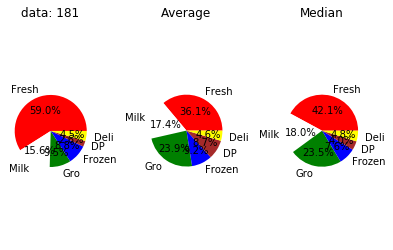

In [4]:
AVG = data.mean()
MED = data.median()

originIndex = data['Fresh'].idxmax()
pack = [data.loc[originIndex], AVG, MED]
x0sample = pd.DataFrame(pack, columns = data.keys()).reset_index(drop = True)

print "Description for the table below"
print "Line 0: data[{}]".format(originIndex)
print "Line 1: Average"
print "Line 2: Median"
display(x0sample)

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey='col')
plt.tight_layout(pad=2.5)
ax1.pie(x0, labels=labels, colors=colors, autopct='%1.1f%%', center=(0,0), radius=2.5, labeldistance=1.2) # Maybe restaurant
ax2.pie(AVG, labels=labels, colors=colors, autopct='%1.1f%%', center=(0,0), radius=2.5, labeldistance=1.2) # average 
ax3.pie(MED, labels=labels, colors=colors, autopct='%1.1f%%', center=(0,0), radius=2.5, labeldistance=1.2) # median
ax1.axis('equal')
ax2.axis('equal')
ax3.axis('equal')
ax1.set_title('data: {}'.format(originIndex))
ax2.set_title('Average')
ax3.set_title('Median')

**回答:**(问题 1-1）

如上图所示

- 代表点 0 可能是餐饮业客户，例如饭馆/餐厅

Description for the table below
Line 0: data[85]
Line 1: Average
Line 2: Median


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,16117.000000,46197.000000,92780.000000,1026.000000,40827.000000,2944.000000
1,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
2,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000


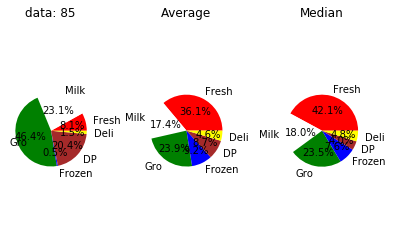

In [5]:
originIndex = data['Grocery'].idxmax()
pack = [data.loc[originIndex], AVG, MED]
x2sample = pd.DataFrame(pack, columns = data.keys()).reset_index(drop = True)

print "Description for the table below"
print "Line 0: data[{}]".format(originIndex)
print "Line 1: Average"
print "Line 2: Median"
display(x2sample)

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey='col')
plt.tight_layout(pad=2.5)
ax1.pie(x2, labels=labels, colors=colors, autopct='%1.1f%%', center=(6,6), radius=2.5, labeldistance=1.2) # Maybe supermarket
ax2.pie(AVG, labels=labels, colors=colors, autopct='%1.1f%%', center=(0,0), radius=2.5, labeldistance=1.2) # average 
ax3.pie(MED, labels=labels, colors=colors, autopct='%1.1f%%', center=(0,0), radius=2.5, labeldistance=1.2) # median
ax1.axis('equal')
ax2.axis('equal')
ax3.axis('equal')
ax1.set_title('data: {}'.format(originIndex))
ax2.set_title('Average')
ax3.set_title('Median')

**回答:**(问题 1-2）

如上图所示

+ 代表点 1 可能是超市

Description for the table below
Line 0: data[183]
Line 1: Average
Line 2: Median


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,36847.000000,43950.000000,20170.000000,36534.000000,239.000000,47943.000000
1,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
2,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000


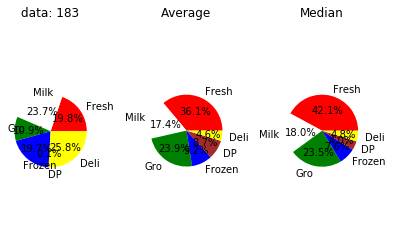

In [6]:
originIndex = data['Delicatessen'].idxmax()
pack = [data.loc[originIndex], AVG, MED]
x5sample = pd.DataFrame(pack, columns = data.keys()).reset_index(drop = True)

print "Description for the table below"
print "Line 0: data[{}]".format(originIndex)
print "Line 1: Average"
print "Line 2: Median"
display(x5sample)

f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey='col')
plt.tight_layout(pad=2.5)
ax1.pie(x5, labels=labels, colors=colors, autopct='%1.1f%%', center=(12,0), radius=2.5, labeldistance=1.2) # Maybe retailer
ax2.pie(AVG, labels=labels, colors=colors, autopct='%1.1f%%', center=(0,0), radius=2.5, labeldistance=1.2) # average 
ax3.pie(MED, labels=labels, colors=colors, autopct='%1.1f%%', center=(0,0), radius=2.5, labeldistance=1.2) # median
ax1.axis('equal')
ax2.axis('equal')
ax3.axis('equal')
ax1.set_title('data: {}'.format(originIndex))
ax2.set_title('Average')
ax3.set_title('Median')

**回答:**(问题 1-3）

如上图所示

+ 代表点 2 可能是零售商

### 练习: 特征相关性
一个有趣的想法是，考虑这六个类别中的一个（或者多个）产品类别，是否对于理解客户的购买行为具有实际的相关性。也就是说，当用户购买了一定数量的某一类产品，我们是否能够确定他们必然会成比例地购买另一种类的产品。通过简单地使用监督学习的算法，我们能够通过在移除某一个特征的数据子集上构建一个有监督的回归学习器，然后判断这个模型对于移除特征的预测得分，通过这种方法我们能检验上面的假设。

在下面的代码单元中，你需要实现以下的功能：
 - 使用`DataFrame.drop`函数移除数据集中你选择的不需要的特征，并将移除后的结果赋值给`new_data`。
 - 使用`sklearn.cross_validation.train_test_split`将数据集分割成训练集和测试集。
   - 使用移除的特征作为你的目标标签。设置`test_size`为`0.25`并设置一个`random_state`。
 - 导入一个决策树回归器，设置一个`random_state`，然后用训练集训练它。
 - 使用回归器的`score`函数输出模型在测试集上的预测得分。

In [8]:
# TODO：为DataFrame创建一个副本，用'drop'函数丢弃一些指定的特征
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

#####new_data = data.drop(['Frozen', 'Fresh', 'Milk', 'Delicatessen', 'Detergents_Paper'], axis=1)

# TODO：使用给定的特征作为目标，将数据分割成训练集和测试集
#####X_train, X_test, y_train, y_test = train_test_split(new_data, data['Detergents_Paper'], test_size=0.25, random_state=19)

# TODO：创建一个决策树回归器并在训练集上训练它
#####regressor = DecisionTreeRegressor(random_state=128)
#####regressor.fit(X_train, y_train)

# TODO：输出在测试集上的预测得分
#####score = regressor.score(X_test, y_test)
#####print data.keys()
scoreMax = 0
scoreThreshold = 0.8
featureBaseMax = []
featureDestMax = []
featureBaseThr = []
featureDestThr = []
for i in range(1, 63):
    # Preprocessing
    k = str(bin(i))[2:]
    if (len(k) < 6):
        length = len(k)
        for j in range(6 - length):
            k = '0'+k
    digitOneList = [int(ii) for ii in range(6) if ('1' == k[ii])]
    
    # Drop Features
    dropFeatures = [data.keys()[ii] for ii in digitOneList]
    new_data = data.drop(dropFeatures, axis=1)
    
    # For-loop
    for feature in dropFeatures:
        X_train, X_test, y_train, y_test = train_test_split(new_data, data[feature], test_size=0.25, random_state=19)
        regressor = DecisionTreeRegressor(random_state=128)
        regressor.fit(X_train, y_train)
        score = regressor.score(X_test, y_test)
        if (score > scoreMax):
            scoreMax = score
            featureBaseMax = dropFeatures
            featureDestMax = [feature]
        if (score > scoreThreshold):
            featureBaseThr.append(dropFeatures)
            featureDestThr.append(feature)
    
       
# loop 80
print featureBaseThr
print featureDestThr
print featureBaseMax
print featureDestMax
print scoreMax

[['Fresh', 'Milk', 'Frozen', 'Detergents_Paper', 'Delicatessen'], ['Fresh', 'Milk', 'Grocery', 'Frozen'], ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Delicatessen']]
['Detergents_Paper', 'Grocery', 'Grocery']
['Fresh', 'Milk', 'Grocery', 'Frozen']
['Grocery']
0.831665382668


### 问题 2
*你尝试预测哪一个特征？预测的得分是多少？这个特征对于区分用户的消费习惯来说必要吗？*  
**提示：** 决定系数（coefficient of determination）, `R^2`,结果在0到1之间，1表示完美拟合，一个负的`R^2`表示模型不能够拟合数据。

**回答:**

尝试预测 **Grocery** 这一特征。预测得分是 0.8317（保留小数点后 4 位小数）。

该特征对于区分用户的消费习惯来说可能是不必要的，因为大概有接近 85% 的概率能够用其他的特征来预测该特征的数值，意味着用户的消费习惯可以通过其他变量来预测。

### 可视化特征分布
为了能够对这个数据集有一个更好的理解，我们可以对数据集中的每一个产品特征构建一个散布矩阵（scatter matrix）。如果你发现你在上面尝试预测的特征对于区分一个特定的用户来说是必须的，那么这个特征和其它的特征可能不会在下面的散射矩阵中显示任何关系。相反的，如果你认为这个特征对于识别一个特定的客户是没有作用的，那么通过散布矩阵可以看出在这个数据特征和其它特征中有关联性。运行下面的代码以创建一个散布矩阵。

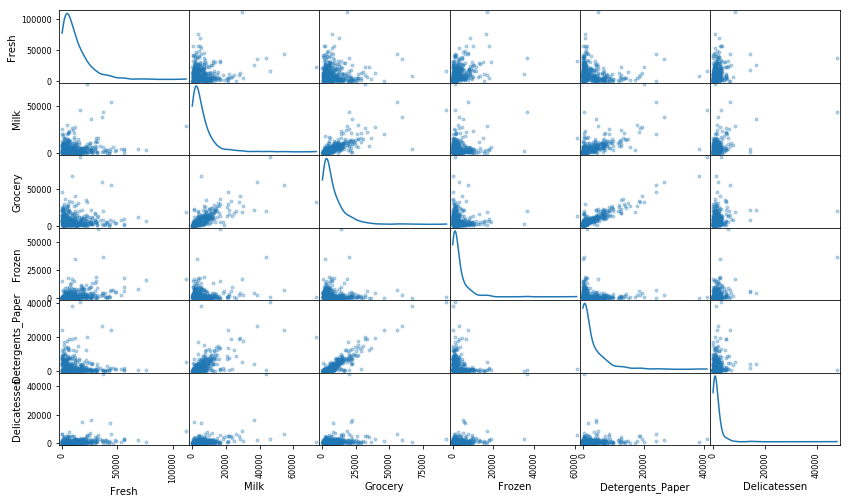

In [9]:
# 对于数据中的每一对特征构造一个散布矩阵
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

In [10]:
import scipy

normaltest_k2, normaltest_p =  scipy.stats.normaltest(data)

d_sk = []

for ind, i in enumerate(data.keys()):
    tempd = {}
    
    ks_stat, ks_p = scipy.stats.kstest(data[i], 'norm')
    skewness = scipy.stats.skew(data[i])
    skew_z, skew_p = scipy.stats.skewtest(data[i])
    kurtosis = scipy.stats.kurtosis(data[i])
    kurtosis_z, kurtosis_p = scipy.stats.kurtosistest(data[i])
    
    tempd['Normaltest? k2'] = normaltest_k2[ind]
    tempd['Normaltest? P-Value'] = normaltest_p[ind]
    tempd['KStest? Stat'] = ks_stat
    tempd['KStest? P-Value'] = ks_p
    tempd['Skewness'] = skewness
    tempd['Skew Normally? Stat'] = skew_z
    tempd['Skew Normally? P-Value'] = skew_p
    tempd['Kurtosis'] = kurtosis
    tempd['Kurtosis Normally? Stat'] = kurtosis_z
    tempd['Kurtosis Normally? P-Value'] = kurtosis_p
    d_sk.append(pd.Series(tempd))

#     print "-----**{}**-----".format(i)
#     print "{} is distributed normally? KS: {}".format(i, scipy.stats.kstest(data[i], 'norm'))
#     #print "{} is distributed normally? Anderson: {}".format(i, scipy.stats.anderson(data[i]))
#     print "{} skewness: {}".format(i, scipy.stats.skew(data[i]))
#     print "{} skewtest: {}".format(i, scipy.stats.skewtest(data[i]))
#     print "{} kurtosis: {}".format(i, scipy.stats.kurtosis(data[i]))
#     print "{} kurtosistest: {}".format(i, scipy.stats.kurtosistest(data[i]))
#     print "----------\n"

cols_normaltest = [
    'Normaltest? k2',
    'Normaltest? P-Value',
    'KStest? Stat',
    'KStest? P-Value',
    'Skewness',
    'Skew Normally? Stat',
    'Skew Normally? P-Value',
    'Kurtosis',
    'Kurtosis Normally? Stat',
    'Kurtosis Normally? P-Value'
]

normalsample = pd.DataFrame(d_sk, columns = cols_normaltest).reset_index(drop = True)

print "Description for the table below"
print "Line 0: Fresh"
print "Line 1: Milk"
print "Line 2: Grocery"
print "Line 3: Frozen"
print "Line 4: Detergents_Paper"
print "Line 5: Delicatessen"
display(normalsample)

# print "有点问题，回来再处理"

Description for the table below
Line 0: Fresh
Line 1: Milk
Line 2: Grocery
Line 3: Frozen
Line 4: Detergents_Paper
Line 5: Delicatessen


,Normaltest? k2,Normaltest? P-Value,KStest? Stat,KStest? P-Value,Skewness,Skew Normally? Stat,Skew Normally? P-Value,Kurtosis,Kurtosis Normally? Stat,Kurtosis Normally? P-Value
0,274.341627,2.675917e-60,0.99865,0.0,2.552583,13.363200,9.920556e-41,11.392124,9.786036,1.292643e-22
1,410.653643,6.725035e-90,1.00000,0.0,4.039922,16.597463,7.269894e-62,24.376349,11.626601,3.018799e-31
2,374.023306,6.051613e-82,0.99865,0.0,3.575187,15.727789,9.755867e-56,20.664153,11.254331,2.204937e-29
3,546.903996,1.743035e-119,1.00000,0.0,5.887826,19.301887,5.178311e-83,54.056180,13.203831,8.338427e-40
4,371.819933,1.821074e-81,0.99865,0.0,3.619458,15.815137,2.446752e-56,18.780528,11.031834,2.683364e-28
5,793.298330,5.463316e-173,0.99865,0.0,11.113534,23.905153,2.707223e-126,168.747781,14.894361,3.585966e-50


### 问题 3
*这里是否存在一些特征他们彼此之间存在一定程度相关性？这个结果是验证了还是否认了你尝试预测的那个特征的相关性？这些特征的数据是怎么分布的？*

**提示：** 这些数据是正态分布(normally distributed)的吗？大多数的数据点分布在哪？

**回答:**

### 1 特征之间的相关性

有一些特征彼此之间存在一定程度相关性，例如：

+ `Grocery` 和 `Detergents_Paper` 线性正相关
+ `Grocery` 和 `Milk` 也有一定程度的线性正相关；`Detergents_Paper` 与 `Milk` 也有一定程度的线性正相关。但这 2 对关系都比前面那对关系（`Grocery` 与 `Detergents_Paper`）弱一点

结果验证了我对 `Grocery` 的相关性的预测。

### 2 各特征的数据分布

任何单个特征对应数据均不服从正态分布，均为正偏态、尖峰态。理由是：

+ 散布矩阵对角线上的分布图直观感受
+ 如上所示，测量了各特征的[偏度（skewness）](https://docs.scipy.org/doc/scipy-0.13.0/reference/generated/scipy.stats.skew.html)和[峰度（kurtosis）](https://docs.scipy.org/doc/scipy-0.13.0/reference/generated/scipy.stats.kurtosis.html#scipy.stats.kurtosis)，均为正，这与正态分布（偏度与峰度均为 0）的定义不符，与正偏态（偏度为正）、尖峰态（峰度为正）的定义一致
+ 如上所示，对各特征进行了一系列检验，检验结果的 p 值均极小，几乎接近 0，这意味着所有检验结果都拒绝零假设（零假设：数据分布为正态分布）：
    - [基于 D’Agostino and Pearson 的理论正态性检验（normaltest）](https://docs.scipy.org/doc/scipy-0.13.0/reference/generated/scipy.stats.normaltest.html)
    - [Kolmogorov-Smirnov 检验(kstest)](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html)
    - [偏度检验（skewtest）](https://docs.scipy.org/doc/scipy-0.13.0/reference/generated/scipy.stats.skewtest.html#scipy.stats.skewtest)
    - [峰度检验（kurtosistest）](https://docs.scipy.org/doc/scipy-0.13.0/reference/generated/scipy.stats.kurtosistest.html#scipy.stats.kurtosistest)

## 数据预处理
在这个部分，你将通过在数据上做一个合适的缩放，并检测异常点（你可以选择性移除）将数据预处理成一个更好的代表客户的形式。预处理数据是保证你在分析中能够得到显著且有意义的结果的重要环节。

### 练习: 特征缩放
如果数据不是正态分布的，尤其是数据的平均数和中位数相差很大的时候（表示数据非常歪斜）。这时候通常用一个非线性的缩放是[很合适的](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) — 尤其是对于金融数据。一种实现这个缩放的方法是使用[Box-Cox 变换](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html)，这个方法能够计算出能够最佳减小数据倾斜的指数变换方法。一个比较简单的并且在大多数情况下都适用的方法是使用自然对数。

在下面的代码单元中，你将需要实现以下功能：
 - 使用`np.log`函数在数据 `data` 上做一个对数缩放，然后将它的副本（不改变原始data的值）赋值给`log_data`。
 - 使用`np.log`函数在样本数据 `samples` 上做一个对数缩放，然后将它的副本赋值给`log_samples`。

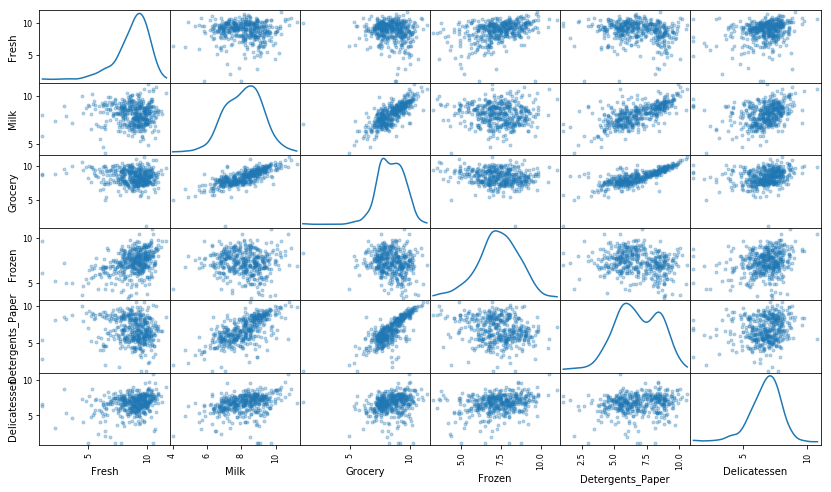

In [11]:
# TODO：使用自然对数缩放数据
log_data = np.log(data)

# TODO：使用自然对数缩放样本数据
log_samples = np.log(samples)

# 为每一对新产生的特征制作一个散射矩阵
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### 观察
在使用了一个自然对数的缩放之后，数据的各个特征会显得更加的正态分布。对于任意的你以前发现有相关关系的特征对，观察他们的相关关系是否还是存在的（并且尝试观察，他们的相关关系相比原来是变强了还是变弱了）。

运行下面的代码以观察样本数据在进行了自然对数转换之后如何改变了。

In [12]:
# 展示经过对数变换后的样本数据
display(log_samples)

#plt.pie(log_data.iloc[154], labels=labels, colors=colors, autopct='%1.1f%%', center=(0,0), radius=2, labeldistance=1.1)
#plt.axis('equal')

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,11.627601,10.296441,9.806316,9.725855,8.506739,9.053687
1,9.687630,10.740670,11.437986,6.933423,10.617099,7.987524
2,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768


### 练习: 异常值检测
对于任何的分析，在数据预处理的过程中检测数据中的异常值都是非常重要的一步。异常值的出现会使得把这些值考虑进去后结果出现倾斜。这里有很多关于怎样定义什么是数据集中的异常值的经验法则。这里我们将使用[Tukey的定义异常值的方法](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/)：一个*异常阶（outlier step）*被定义成1.5倍的四分位距（interquartile range，IQR）。一个数据点如果某个特征包含在该特征的IQR之外的特征，那么该数据点被认定为异常点。

在下面的代码单元中，你需要完成下面的功能：
 - 将指定特征的25th分位点的值分配给`Q1`。使用`np.percentile`来完成这个功能。
 - 将指定特征的75th分位点的值分配给`Q3`。同样的，使用`np.percentile`来完成这个功能。
 - 将指定特征的异常阶的计算结果赋值给`step`.
 - 选择性地通过将索引添加到`outliers`列表中，以移除异常值。

**注意：** 如果你选择移除异常值，请保证你选择的样本点不在这些移除的点当中！
一旦你完成了这些功能，数据集将存储在`good_data`中。

In [13]:
# 对于每一个特征，找到值异常高或者是异常低的数据点
dataIntersection = {} #dataIntersection = []
for feature in log_data.keys():
    
    # TODO：计算给定特征的Q1（数据的25th分位点）
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO：计算给定特征的Q3（数据的75th分位点）
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO：使用四分位范围计算异常阶（1.5倍的四分位距）
    # 注意：四分位距（IQR）= Q3 - Q1；四分位差（QD）= IQR / 2
    IQR   = Q3 - Q1
    step = 1.5 * IQR
    
    # 显示异常点
    print "Data points considered outliers for the feature '{}':".format(feature)
    tempData = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    display(tempData)
    #if (0 == len(dataIntersection)):
    #    dataIntersection = tempData.index
    #else:
    if (0 != len(tempData)):
        for ii in tempData.index:  #dataIntersection = dataIntersection.intersection(tempData.index)
            if (ii in dataIntersection.keys()):
                dataIntersection[ii] += 1
            else:
                dataIntersection[ii] = 1

out1 = [ii for ii in dataIntersection.keys() if dataIntersection[ii] >= 1]
out2 = [ii for ii in dataIntersection.keys() if dataIntersection[ii] >= 2]
out3 = [ii for ii in dataIntersection.keys() if dataIntersection[ii] >= 3]
out4 = [ii for ii in dataIntersection.keys() if dataIntersection[ii] >= 4]
# 可选：选择你希望移除的数据点的索引
outliers = out1
print "Outliers are listed below: "
display(log_data.loc[outliers])

# 如果选择了的话，移除异常点
good_data = log_data.drop(outliers).reset_index(drop = True)

print len(outliers)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


Outliers are listed below: 


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
412,4.574711,8.190077,9.425452,4.584967,7.996317,4.127134
285,10.602965,6.461468,8.188689,6.948897,6.077642,2.890372
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


42


### 问题 4
*这里是否存在一些数据点，它有多于一个的属性在上面的定义下被看作是异常的？这些点应该被从数据集中移除吗？如果你加入了一些点到`outliers`中准备被移除的话，请解释为什么？* 

**回答:**

- 有，这些点不止 1 个，共计 42 个。
- 最终我选择移除那些在所有特征中异常数至少 1 次的点，原因是：
    - 这些点不仅不在 Q1 与 Q3 之间，也超过了容许范围（1.5 倍 IQR），可能是有问题的点，或许会影响到算法构建学习器
    - 选择异常数至少 1 次的点移除，数目大约占总数的 10%，这个范围尚可接受

## 特征转换
在这个部分中你将使用主成分分析（PCA）来分析批发商客户数据的内在结构。由于使用PCA在一个数据集上会计算出最大化方差的维度，我们将找出哪一个特征组合能够最好的描绘客户。

### 练习: 主成分分析（PCA）

既然数据被缩放到一个更加正态分布的范围中并且我们也移除了需要移除的异常点，我们现在就能够在`good_data`上使用PCA算法以发现数据的哪一个维度能够最大化特征的方差。除了找到这些维度，PCA也将报告每一个维度的*解释方差比（explained variance ratio）*--这个数据有多少方差能够用这个单独的维度来解释。注意PCA的一个组成部分（维度）能够被看做这个空间中的一个新的“特征”，但是它是原来数据中的特征构成的。

在下面的代码单元中，你将要实现下面的功能：
 - 导入`sklearn.decomposition.PCA`并且将`good_data`用PCA并且使用6个维度进行拟合后的结果保存到`pca`中。
 - 使用`pca.transform`将`log_samples`进行一个PCA映射，并将结果存储到`pca_samples`中。

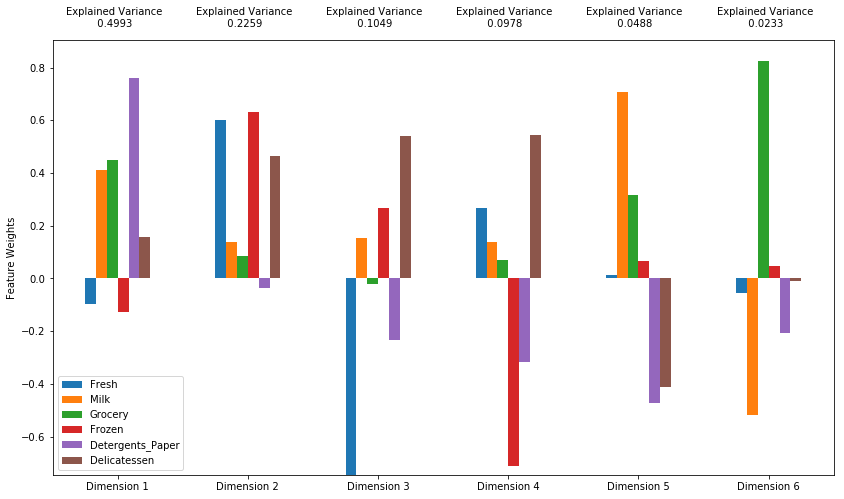

In [14]:
from sklearn.decomposition import PCA
# TODO：通过在good data上使用PCA，将其转换成和当前特征数一样多的维度
pca = PCA(n_components=len(good_data.keys()))
pca.fit(good_data)

# TODO：使用上面的PCA拟合将变换施加在样本log-data上
pca_samples = pca.transform(log_samples)

# 生成PCA的结果图
pca_results = rs.pca_results(good_data, pca)

### 问题 5
*数据的第一个和第二个主成分* **总共** *表示了多少的方差？*  前四个主成分呢？使用上面提供的可视化图像，讨论从用户花费的角度来看前四个特征最能代表什么。

**提示：** 某一特定维度上的正向增长对应**正权**特征的**增长**和**负权**特征的**减少**。增长和减少的速率和每个特征的权重相关。

**回答:**

+ 前 2 个主成分 **总共** 解释了 0.7252 的方差
+ 前 4 个主成分 **总共** 解释了 0.9279 的方差
+ 前 4 个特征代表
    - 第 1 个特征代表：零售或超市部门的「日用品」消费组合。具体而言：{[清洁剂与纸]+[牛奶]+[杂货]}是互补的消费组合，即这些商品的消费之间呈正相关；该组合的消费与{[生鲜]+[冷冻产品]}这一组合的消费成负相关。
    - 第 2 个特征代表：餐饮原料相关的消费组合（如饭店采购等）。具体而言：以{[生鲜]+[冷冻产品]+[熟食]}为主要的消费组合。
    - 第 3 个特征代表：速食原料相关的消费组合（如咖啡厅采购等）。具体而言：以{[牛奶]+[冷冻产品]+[熟食]}为主的消费组合内部各商品销量互补，而该组合与另一组以{[生鲜]+[清洁剂与纸]}为主的互补组合的销量是负相关的。
    - 第 4 个特征代表：家庭餐饮原料相关的消费组合。具体而言：以{[牛奶]+[生鲜]+[熟食]}为主的互补消费组合，与以{[冷冻产品]+[清洁剂与纸]}为主的互补消费组合的销量是负相关的。

### 观察
运行下面的代码，查看经过对数转换的样本数据在进行一个6个维度的主成分分析（PCA）之后会如何改变。观察样本数据的前四个维度的数值。考虑这和你初始对样本点的解释是否一致。

In [15]:
# 展示经过PCA转换的sample log-data
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,2.6240,4.4608,-0.2695,0.1618,0.4241,-0.3959
1,5.5240,1.1625,-0.6076,0.5663,0.4874,0.2678
2,0.8131,5.2596,2.4735,1.2656,1.4993,0.1986


### 练习：降维
当使用主成分分析的时候，一个主要的目的是减少数据的维度，这实际上降低了问题的复杂度。当然降维也是需要一定代价的：更少的维度能够表示的数据中的总方差更少。因为这个，*累计解释方差比（cumulative explained variance ratio）*对于我们确定这个问题需要多少维度非常重要。另外，如果大部分的方差都能够通过两个或者是三个维度进行表示的话，降维之后的数据能够被可视化。

在下面的代码单元中，你将实现下面的功能：
 - 将`good_data`用两个维度的PCA进行拟合，并将结果存储到`pca`中去。
 - 使用`pca.transform`将`good_data`进行转换，并将结果存储在`reduced_data`中。
 - 使用`pca.transform`将样本log-data `log_samples`进行转换，并将结果存储在`pca_samples`中。

In [16]:
# TODO：通过在good data上进行PCA，将其转换成两个维度
pca = PCA(n_components=2)
pca.fit(good_data)

# TODO：使用上面训练的PCA将good data进行转换
reduced_data = pca.transform(good_data)

# TODO：使用上面训练的PCA将sample log-data进行转换
pca_samples = pca.transform(log_samples)

# 为降维后的数据创建一个DataFrame
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### 观察
运行以下代码观察当仅仅使用两个维度进行PCA转换后，这个对数样本数据将怎样变化。观察这里的结果与一个使用六个维度的PCA转换相比较时，前两维的数值是保持不变的。

In [17]:
# 展示经过两个维度的PCA转换之后的样本log-data
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,2.6240,4.4608
1,5.5240,1.1625
2,0.8131,5.2596


## 聚类

在这个部分，你将选择使用K-Means聚类算法或者是高斯混合模型聚类算法以发现数据中隐藏的客户分类。然后，你将从簇中恢复一些特定的关键数据点，通过将它们转换回原始的维度和规模，从而理解他们的含义。

### 问题 6
*使用K-Means聚类算法的优点是什么？使用高斯混合模型聚类算法的优点是什么？基于你现在对客户数据的观察结果，你选用了这两个算法中的哪一个，为什么？*

**回答:**

1. 算法比较：
    - K-Means 聚类算法的优点是简单、直接
    - 高斯混合模型聚类算法的优点是允许模糊地带，从而能够综合考虑多种聚类结果的可能性
    
2. 基于我现在对客户数据的观察结果，我决定采用**高斯混合模型聚类算法**，因为我认为，有一些点在现有 6 个特征上的量确实处于模糊地带，并不是很容易能够分辨出属于哪个类别。

### 练习: 创建聚类

针对不同情况，有些问题你需要的聚类数目可能是已知的。但是在聚类数目不作为一个**先验**知道的情况下，我们并不能够保证某个聚类的数目对这个数据是最优的，因为我们对于数据的结构（如果存在的话）是不清楚的。但是，我们可以通过计算每一个簇中点的**轮廓系数**来衡量聚类的质量。数据点的[轮廓系数](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)衡量了它与分配给他的簇的相似度，这个值范围在-1（不相似）到1（相似）。**平均**轮廓系数为我们提供了一种简单地度量聚类质量的方法。

在接下来的代码单元中，你将实现下列功能：
 - 在`reduced_data`上使用一个聚类算法，并将结果赋值到`clusterer`。
 - 使用`clusterer.predict`预测`reduced_data`中的每一个点的簇，并将结果赋值到`preds`。
 - 使用算法的某个属性值找到聚类中心，并将它们赋值到`centers`。
 - 预测`pca_samples`中的每一个样本点的类别并将结果赋值到`sample_preds`。
 - 导入sklearn.metrics.silhouette_score包并计算`reduced_data`相对于`preds`的轮廓系数。
   - 将轮廓系数赋值给`score`并输出结果。

In [18]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

print "GaussianMixture\n----------"
scoreBest = 0
for i in range(2,7):
    # TODO：在降维后的数据上使用你选择的聚类算法
    clusterer = GaussianMixture(n_components=i, random_state=19).fit(reduced_data)#KMeans(n_clusters=i, random_state=19).fit(reduced_data)#

    # TODO：预测每一个点的簇
    preds = clusterer.predict(reduced_data)

    # TODO：找到聚类中心
    centers = clusterer.means_#clusterer.cluster_centers_#

    # TODO：预测在每一个转换后的样本点的类
    sample_preds = clusterer.predict(pca_samples)

    # TODO：计算选择的类别的平均轮廓系数（mean silhouette coefficient）
    score = silhouette_score(reduced_data, preds)
    print "{} components: {}".format(i, score)
    if (score > scoreBest):
        scoreBest = score
        clustersBest = i
        clustererBest = clusterer
        centersBest = centers
        predsBest = preds
        sampleBest = sample_preds

clusterer = clustererBest
centers = centersBest
score = scoreBest
preds = predsBest
sample_preds = sampleBest
print "----------"
print clustersBest
print centers
print score

GaussianMixture
----------
2 components: 0.446753526945
3 components: 0.36214071843
4 components: 0.307028347261
5 components: 0.301298387339
6 components: 0.341436655274
----------
2
[[ 2.09897893 -0.28069508]
 [-1.26441765  0.16908975]]
0.446753526945


### 问题 7

*汇报你尝试的不同的聚类数对应的轮廓系数。在这些当中哪一个聚类的数目能够得到最佳的轮廓系数？* 

**回答:**

聚类数为 2 时轮廓系数最佳

### 聚类可视化
一旦你选好了通过上面的评价函数得到的算法的最佳聚类数目，你就能够通过使用下面的代码块可视化来得到的结果。作为实验，你可以试着调整你的聚类算法的聚类的数量来看一下不同的可视化结果。但是你提供的最终的可视化图像必须和你选择的最优聚类数目一致。

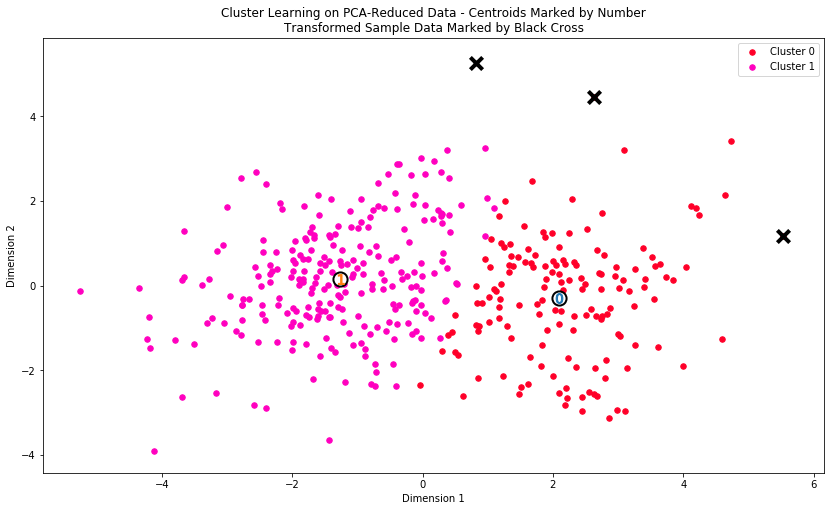

In [19]:
# 从已有的实现中展示聚类的结果
rs.cluster_results(reduced_data, preds, centers, pca_samples)

### 练习: 数据恢复
上面的可视化图像中提供的每一个聚类都有一个中心点。这些中心（或者叫平均点）并不是数据中真实存在的点，但是是所有预测在这个簇中的数据点的*平均*。对于创建客户分类的问题，一个簇的中心对应于*那个分类的平均用户*。因为这个数据现在进行了降维并缩放到一定的范围，我们可以通过施加一个反向的转换恢复这个这个点所代表的用户的花费。

在下面的代码单元中，你将实现下列的功能：
 - 使用`pca.inverse_transform`将`centers` 反向转换，并将结果存储在`log_centers`中。
 - 使用`np.log`的反函数`np.exp`反向转换`log_centers`并将结果存储到`true_centers`中。


In [20]:
# TODO：反向转换中心点
log_centers = pca.inverse_transform(centers)

# TODO：对中心点做指数转换
true_centers = np.exp(log_centers)

# 显示真实的中心点
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,5219.0,7671.0,11403.0,1079.0,4413.0,1099.0
Segment 1,9494.0,2049.0,2598.0,2203.0,337.0,796.0


### 问题 8
考虑上面的代表性数据点在每一个产品类型的花费总数，并且参考在项目最开始得到的统计值。*你认为这些客户分类代表了哪类客户？*

**提示：** 一个被分到`'Cluster X'`的客户最好被用 `'Segment X'`中的特征集来标识的企业类型表示。

Description for the table below
Line 0: Segment 0
Line 0: Segment 1
Line 2: Average
Line 3: Median


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,5219.000000,7671.000000,11403.000000,1079.000000,4413.000000,1099.000000
1,9494.000000,2049.000000,2598.000000,2203.000000,337.000000,796.000000
2,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
3,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000


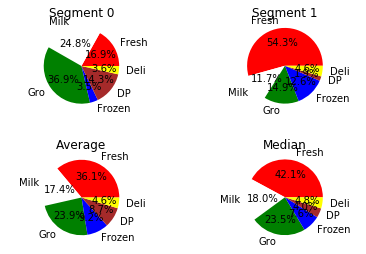

In [21]:
ff, ((ax01, ax02), (ax11, ax12)) = plt.subplots(nrows=2, ncols=2, sharey='col')
plt.tight_layout(pad=2.5)

ax01.pie(true_centers.iloc[0], labels=labels, colors=colors, autopct='%1.1f%%', center=(0,0), radius=2.5, labeldistance=1.2)
ax02.pie(true_centers.iloc[1], labels=labels, colors=colors, autopct='%1.1f%%', center=(0,0), radius=2.5, labeldistance=1.2)

ax11.pie(AVG, labels=labels, colors=colors, autopct='%1.1f%%', center=(0,0), radius=2.5, labeldistance=1.2)
ax12.pie(MED, labels=labels, colors=colors, autopct='%1.1f%%', center=(0,0), radius=2.5, labeldistance=1.2)

for i in [ax01, ax02, ax11, ax12]:
    i.axis('equal')

ax01.set_title('Segment 0')
ax02.set_title('Segment 1')

ax11.set_title('Average')
ax12.set_title('Median')

segments = [true_centers.iloc[0], true_centers.iloc[1], AVG, MED]
segmentSample = pd.DataFrame(segments, columns = data.keys()).reset_index(drop = True)


print "Description for the table below"
print "Line 0: Segment 0"
print "Line 0: Segment 1"
print "Line 2: Average"
print "Line 3: Median"
display(segmentSample)

**回答:**

如上图所示的对比可以推断

+ Segment 0 代表零售相关的企业：很容易发现 Segment 0 代表的数据点中，**杂货（Grocery）**所占的比例**远远超过**总体的中位数和平均数，**清洁剂与纸（Detergents_Paper）、牛奶（Milk）**的比重也明显超过中位数和平均数，生鲜（Fresh）、冷冻食品（Frozen）、熟食（Delicatessen）偏少，是典型的超市/零售店/便利店等组织
+ Segment 1 代表餐饮相关的企业：很容易发现 Segment 1 代表的数据点中，**生鲜（Fresh）**所占的比例**远远超过**总体的中位数和平均数，**冷冻食品（Frozen）**的比例也明显超过中位数和平均数，而杂货（Grocery）、清洁剂与纸（Delicatessen）等比例则偏少，是典型的餐饮类组织

### 问题 9
*对于每一个样本点 * **问题 8**  *中的哪一个分类能够最好的表示它？你之前对样本的预测和现在的结果相符吗？*

运行下面的代码单元以找到每一个样本点被预测到哪一个簇中去。

In [22]:
# 显示预测结果
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1


**回答:**

+ 比较样本点与类的中心点：
    - 代表性数据点 0 更可能属于第 1 类客户（Segment 1）
    - 代表性数据点 1 更可能属于第 0 类客户（Segment 0）
    - 代表性数据点 2 更可能属于第 0 类客户（Segment 0）
+ 算法预测结果是：
    - 代表性数据点 0 属于第 0 类客户（Segment 0）；与我之前对样本的预测不一致
    - 代表性数据点 1 属于第 0 类客户（Segment 0）；与我之前对样本的预测一致
    - 代表性数据点 2 属于第 1 类客户（Segment 1）；与我之前对样本的预测不一致

## 结论

在最后一部分中，你要学习如何使用已经被分类的数据。首先，你要考虑不同组的客户**客户分类**，针对不同的派送策略受到的影响会有什么不同。其次，你要考虑到，每一个客户都被打上了标签（客户属于哪一个分类）可以给客户数据提供一个多一个特征。最后，你会把客户分类与一个数据中的隐藏变量做比较，看一下这个分类是否辨识了特定的关系。

### 问题 10
在对他们的服务或者是产品做细微的改变的时候，公司经常会使用[A/B tests](https://en.wikipedia.org/wiki/A/B_testing)以确定这些改变会对客户产生积极作用还是消极作用。这个批发商希望考虑将他的派送服务从每周5天变为每周3天，但是他只会对他客户当中对此有积极反馈的客户采用。*这个批发商应该如何利用客户分类来知道哪些客户对它的这个派送策略的改变有积极的反馈，如果有的话？*  
**提示** 我们能假设这个改变对所有的客户影响都一致吗？我们怎样才能够确定它对于那个类型的客户它的影响最大？

**回答：**

我们显然**不能**假设这个改变对所有的客户影响都一致。

我们可已从供货对客户的**存货周转**的影响来看。具体说来，我们可以观察**降低供货频率**对于**供应商与客户之间单次交易量**的影响：如果降低供货频率之后，某些客户单次交易量**明显上升**，意味着对方明显受到了缺货的（不良）影响，从而需要囤货；单次交易量**上升**得越多，相应的客户受到的（不良）影响越大。单次交易量上发生重大变动，可能导致**对该客户的分类**发生改变，例如从类别 0 变为了类别 1。

在这里，类别可以来自于我们之前通过聚类等一系列非监督学习工作的结果来划分，也可以通过其他统计的方式，甚至通过直观的感受，根据销售组合的重大差异来来划分。

我们是否需要对每一类客户分别进行A/B测试？

+ 如果批发商更改服务方式的需求很强烈，那么需要对每个类别进行测试，这样才能保证尽可能多的类别能够采用新的服务方式
+ 如果批发商也很在意测试成本，希望采取一种折衷的做法，那么我建议
    - 对于所有类别的客户，应该列出每个类别的客户与批发商之间的交易份额
    - 对于那些交易份额较大的类别（该类别所占交易份额占总交易份额的比重较大），变更服务方式可能会对与该类客户之间的交易产生重大影响，那么我们需要重点测试这些类别，甚至可以只测试这些类别
    - 对于那些交易份额较小的类别（该类别所占交易份额占总交易份额的比重较小），变更服务方式可能对与该类客户之间的交易产生较小的影响，那么我们可以不必测试这些类别，视情况而定是否对这些类别的客户采用新服务方式。保守一点的做法是默认这些客户对新服务方式反馈不佳，在这样的假设下我们对这些客户采用旧有的配送方式

进行A/B测试的时候，参考组与实验组应该如何选择？

+ 对于每个要参加A/B测试的类别cate，都应该对该类别设置一个实验组与对照组
+ 对于每对实验组与对照组，应平分类别cate下的客户数。例如cate类下有 100 个客户，那么实验组和对照组应各取 50 个用户
+ 上一点所说的「平分」不仅指人数上的粗放式平分，更具体地说是指：根据营业类型乃至交易额等进一步细分同一大类下的客户，然后实验组与对照组分配到同样多相同细分类型的客户。
    - 粗略的例子是：对于要参加A/B测试的「餐饮类」客户，共有 100 家，其中有中式快餐店 50 家、西式快餐店 20 家、中式饭馆 30 家，那么应该是实验组与对照组中各有 25 家中式快餐、10 家西式快餐、15 家中式饭馆，而不是实验组中 50 家中式快餐、对照组中 20 家西式快餐与 30 家中式饭馆。

### 问题 11
通过聚类技术，我们能够将原有的没有标记的数据集中的附加结构分析出来。因为每一个客户都有一个最佳的划分（取决于你选择使用的聚类算法），我们可以把*用户分类*作为数据的一个**工程特征**。假设批发商最近迎来十位新顾客，并且他已经为每位顾客每个产品类别年的采购进行了预估。进行了这些估算之后，批发商想把每个新顾客分类到一个客户类别中，从而给他们配置最合适的派送服务。
*批发商如何运用它的预估和**客户分类**来对这十个新的客户的分类？*

**提示：**我们可以用原来的客户训练一个监督学习分类器。目标变量应该是什么？

**回答：**

用原来的客户数据除了“用户分类”以外的特征当作特征变量，以“用户分类”作为目标变量（可能的取值为现有聚类出的簇0、簇1、……等），进行监督学习。然后将这个学习器用户新的顾客的预估量作为特征变量输入，使学习器输出对他们的分类。

### 可视化内在的分布

在这个项目的开始，我们讨论了从数据集中移除`'Channel'`和`'Region'`特征，这样在分析过程中我们就会着重分析用户产品类别。通过重新引入`Channel`这个特征到数据集中，并施加和原来数据集同样的PCA变换的时候我们将能够发现数据集产生一个有趣的结构。

运行下面的代码单元以查看哪一个数据点在降维的空间中被标记为`'HoReCa'` (旅馆/餐馆/咖啡厅)或者`'Retail'`。另外，你将发现样本点在图中被圈了出来，用以显示他们的标签。

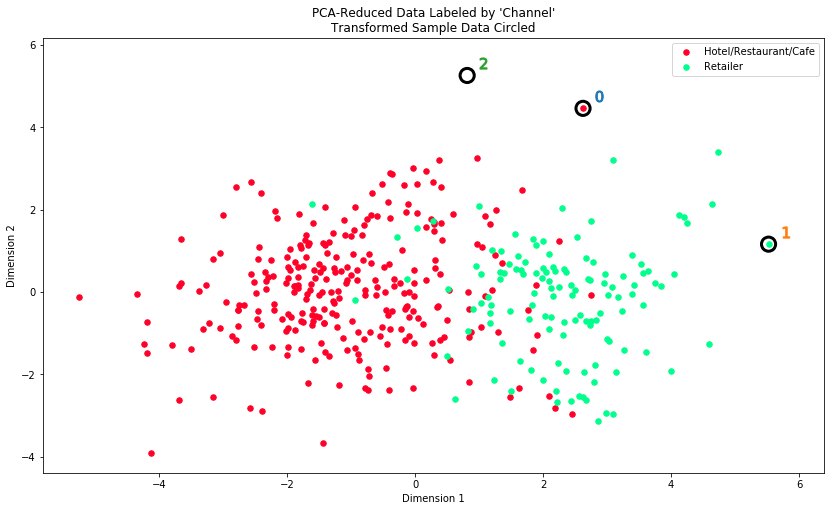

In [23]:
# 根据‘Channel‘数据显示聚类的结果
rs.channel_results(reduced_data, outliers, pca_samples)

### 问题 12

*你选择的聚类算法和聚类点的数目和内在的旅馆/餐馆/咖啡店 分布相比足够好吗？根据这个分布有没有哪个簇能够刚好划分成'零售商'或者是'旅馆/饭店/咖啡馆'你觉得这个分类和前面你对于用户分类的定义是一致的吗？*

**回答：**

与现有的分布相比，我的算法计算结果大致可以，具体到 3 个代表点的表现则不佳：只有 1 的预测结果与我的算法计算结果相同。

根据这个分布，簇 0 刚好划分成 '零售商'，簇 1 刚好划分成'旅馆/饭店/咖啡馆'。

这个分类和前面我对于用户分类的定义是一致的。

> **注意**: 当你写完了所有的代码，并且回答了所有的问题。你就可以把你的 iPython Notebook 导出成 HTML 文件。你可以在菜单栏，这样导出**File -> Download as -> HTML (.html)**把这个 HTML 和这个 iPython notebook 一起做为你的作业提交。  